In [ ]:
import pandas as pd
import numpy as np
import logging

for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    level=logging.INFO,
    format='(%(levelname)s) %(message)s'
)

# df = pd.read_pickle("./conversations.pkl")
df = pd.read_pickle(r'C:\Users\marcv\OneDrive - TU Eindhoven\Escritorio\Data Science\Year 1\Q4\DBL Data Challenge\demo\conversations.pkl')

category_keywords = {
    "flight delays and cancellations": [
        "delay",
        "delayed",
        "cancelled",
        "cancel",
        "rescheduled",
        "late",
        "no information",
        "boarding closed",
    ],
    "baggage and check in issues": [
        "baggage",
        "luggage",
        "lost bag",
        "missing bag",
        "check-in",
        "check in",
        "boarding denied",
        "boarding closed early",
    ],
    "booking app payment problems": [
        "book",
        "booking",
        "app",
        "seat",
        "payment",
        "ticket",
        "website",
        "log in",
        "error",
    ],
    "customer service and response quality": [
        "no reply",
        "ignored",
        "unhelpful",
        "bad service",
        "rude",
        "no response",
        "dm",
        "support",
        "mail",
        "customer-service",
    ],
    "refunds and compensation requests": [
        "refund",
        "compensation",
        "claim",
        "voucher",
        "money back",
        "eu261",
        "reimbursement",
    ],
}

# Initialize counter
categories = {category: 0 for category in category_keywords}
categories["other"] = 0

# for index, conv in df.groupby("conversation"):
#     text = conv.iloc[0]["text"].lower()

#     for category, keywords in category_keywords.items():
#         if any(keyword in text for keyword in keywords):
#             categories[category] += 1
#             df.loc[conv.index, "category"] = category.split()[0]
#             break
#     else:
#         categories["other"] += 1

def evaluate_category(conv: pd.DataFrame):
    global categories

    text = conv.iloc[0]["text"].lower()

    for category, keywords in category_keywords.items():
        if any(keyword in text for keyword in keywords):
            categories[category] += 1
            conv["category"] = category.split()[0]
            break
    else:
        conv["category"] = 'other'
        categories["other"] += 1

    return conv


def compute_sentiment_change(conv: pd.DataFrame):
    initial: int = conv.iloc[0]['sentiment_score']
    latter: int = np.mean(conv.iloc[2:]['sentiment_score'])

    conv['sentiment_change'] = latter - initial
    return conv

#Applying analysis functions to the df

logging.info('Evaluating categories...')
df = df.groupby('conversation', group_keys=False).apply(evaluate_category)
logging.info('Finished evaluating categories.')

logging.info('Computing sentiment change...')
df = df.groupby('conversation', group_keys=False).apply(compute_sentiment_change)
logging.info('Finished computing sentiment change.')

logging.info('DB Saved to pickle file')
df.to_pickle('new_conversations.pkl')

In [22]:
import pandas as pd

path = r'C:\Users\marcv\OneDrive - TU Eindhoven\Escritorio\Data Science\Year 1\Q4\DBL Data Challenge\demo\processed_conversations.pkl'
# path = r'C:\Users\marcv\OneDrive - TU Eindhoven\Escritorio\Data Science\Year 1\Q4\DBL Data Challenge\demo\demo\business-idea\conversations.pkl'
df = pd.read_pickle(path)

df.head(50)

id  \
airline   conversation tweet                        
18332190  0            0      1131178746914983936   
                       1      1131179525944086528   
                       2      1131182798159720448   
22536055  1            0      1131243222322298882   
                       1      1131246739149795329   
                       2      1131249955954405376   
218730857 2            0      1131176727575535616   
                       1      1131179652981153792   
                       2      1131186501868371968   
22536055  3            0      1131245226411122688   
                       1      1131247521949466627   
                       2      1131250099294810113   
18332190  4            0      1131178025901547520   
                       1      1131183936112070658   
                       2      1131199635748470784   
56377143  5            0      1131241449369088000   
                       1      1131247611669819392   
                       2      1131248012762767360   
22536055  6            0      1131385509748584449   
                       1      1131389700692819975   
                       2      1131407485485617152   
18332190  7            0      1131239101296992257   
                       1      1131247727956889601   
                       2      1131268418429173761   
                       3      1131249874693971969   
22536055  8            0      1131348727841677313   
                       1      1131390059565989888   
                       2      1131725979896958976   
38676903  9            0      1131245960607215620   
                       1      1131247797943111680   
                       2      1131248618344722438   
106062176 10           0      1131389753469939712   
                       1      1131390942869688325   
                       2      1131397164092055554   
22536055  11           0      1131389192460808198   
                       1      1131391062625464320   
                       2      1131391255932473345   
          12           0      1131269750724546560   
                       1      1131272131793305600   
                       2      1131276302458081280   
124476322 13           0      1131204005462462464   
                       1      1131205166659756032   
                       2      1131206341148729344   
20626359  14           0      1131246985724473344   
                       1      1131248419366793217   
                       2      1131248838705074178   
22536055  15           0      1131353004559310848   
                       1      1131392128884469760   
                       2      1131393195030396929   
                       3      1131393856170184704   

                                                                           text  \
airline   conversation tweet                                                      
18332190  0            0      "Bye, bye 🇬🇧, hello 🇯🇵 \n\nSee you in Osaka.  ...   
                       1      "@KayBurley You'll be absolutely fine Kay! Got...   
                       2       "@British_Airways I do hope so.  Thanks Tony ☺️"   
22536055  1            0      "I have NEVER had an issue with @AmericanAir E...   
                       1      "@TheCBanksy We'd love for you to fly with us!...   
                       2      "@AmericanAir Y’all are all I’ve flown since c...   
218730857 2            0                        "@Qantas On The qantas website"   
                       1      "@ItsBenParks Hi Ben, please DM us your email ...   
                       2      "@Qantas How do I know I won't be ignored agai...   
22536055  3            0      "Please @AmericanAir hold 2824 from Dallas to ...   
                       1      "@mrbplus We're not always able to hold flight...   
                       2      "@AmericanAir I guess not! And the gate agent ...   
18332190  4            0      "Still waiting new silver exec card since mid ...   
                       1      "@LesleyB378300

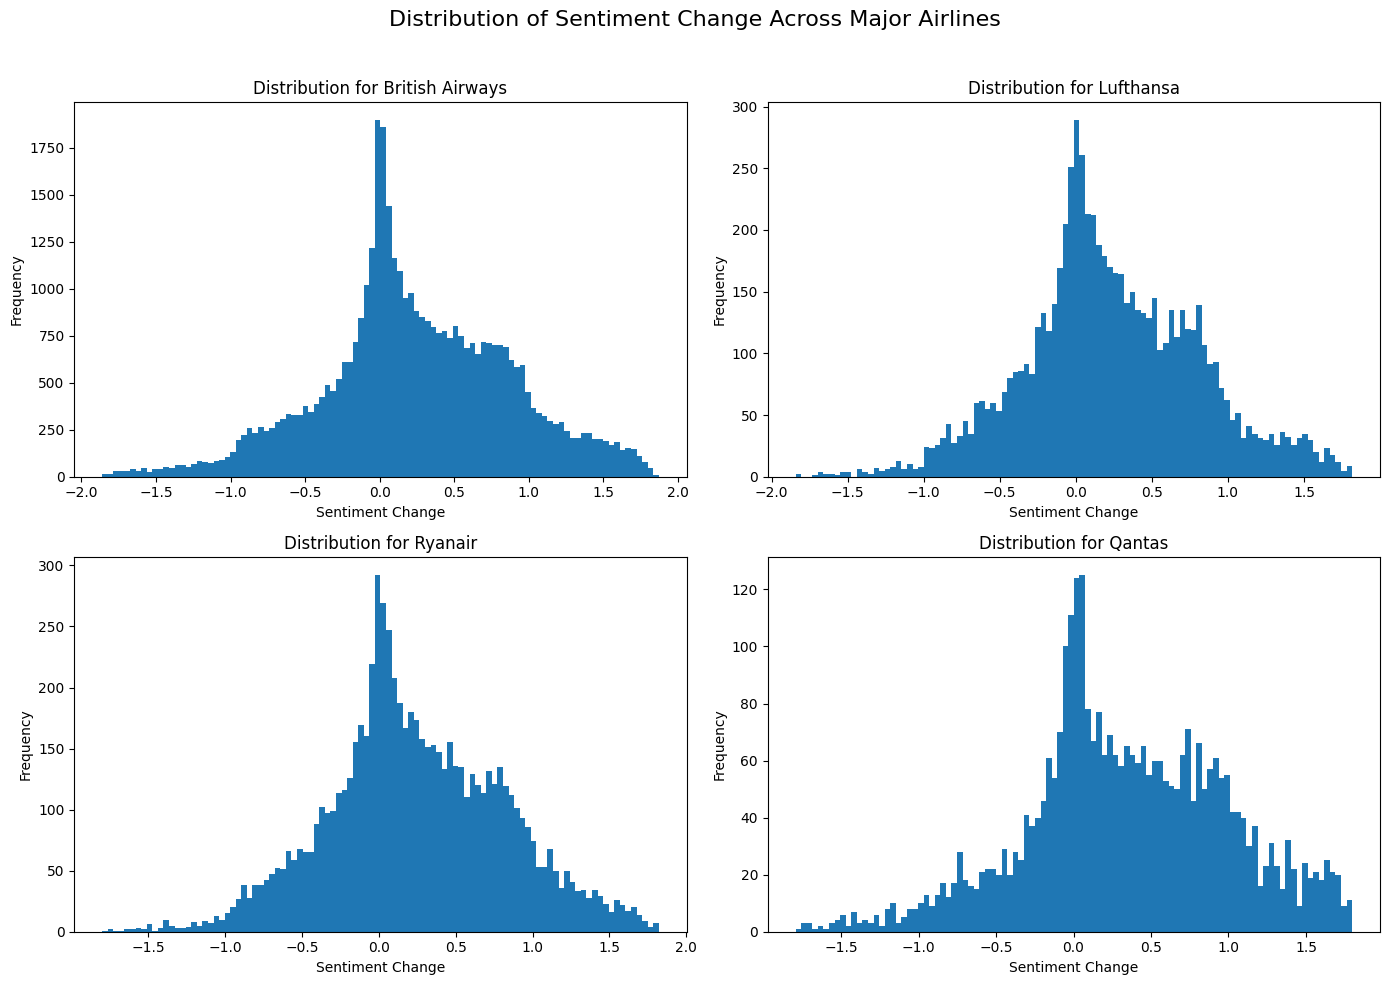

In [1]:
import pandas as pd

path = r'C:\Users\marcv\OneDrive - TU Eindhoven\Escritorio\Data Science\Year 1\Q4\DBL Data Challenge\demo\processed_conversations.pkl'

df = pd.read_pickle(path)

import pandas as pd
import matplotlib.pyplot as plt

airline_data = {
    'British Airways': '18332190',
    'Lufthansa': '124476322',
    'Ryanair': '1542862735',
    'Qantas': '218730857'
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for ax, (airline_name, airline_id) in zip(axes.flatten(), airline_data.items()):
    
    conversations = df.loc[(airline_id, slice(None), 0)]
    
    conversations['sentiment_change'].plot(
        kind='hist',
        bins=100,
        ax=ax
    )
    
    ax.set_title(f'Distribution for {airline_name}')
    ax.set_xlabel('Sentiment Change')
    ax.set_ylabel('Frequency')

fig.suptitle('Distribution of Sentiment Change Across Major Airlines', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [ ]:
import pandas as pd

airline_id = '18332190'

df = pd.read_pickle(r'.\processed_conversations.pkl')

conversations = df.loc[(airline_id, slice(None), 0)][['category', 'sentiment_change']]
conversations.head(10)

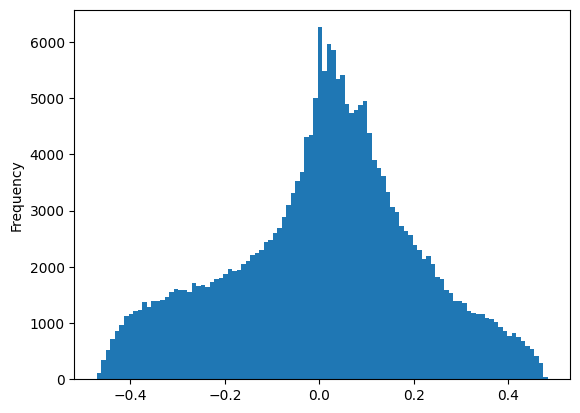

In [ ]:
import pandas as pd

# 1) Flatten your MultiIndex so sentiment_label/score are columns:
df_flat = df.reset_index()

# 2) Compute descriptive stats (including key percentiles) for each label:
stats = (
    df_flat
    .groupby('sentiment_label')['sentiment_score']
    .describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
)

# print(stats)

neutral = df_flat[df_flat['sentiment_label'] == 'neutral']
negative = df_flat[df_flat['sentiment_label'] == 'negative']

fig, ax = plt.subplots()

# Plot
neutral['sentiment_score'].plot(kind='hist', bins=100, ax=ax)

# Show plot
plt.show()

In [ ]:
neutral_negative = df_flat[(df_flat['sentiment_label'] == 'neutral') & (df_flat['sentiment_score'] < -0.3)]

a = 0
for index, row in neutral_negative.iterrows():
    print(row['text'])
    a+=1

    if a==20:
        break

In [ ]:
import datetime
df = pd.read_pickle(r'C:\Users\marcv\OneDrive - TU Eindhoven\Escritorio\Data Science\Year 1\Q4\DBL Data Challenge\demo\processed_conversations.pkl')

def adjust_df(df: pd.DataFrame, start_date: datetime.date, end_date: datetime.date) -> pd.DataFrame:
    if start_date is None or end_date is None:
        return df
    
    conversations = df.xs(0, level = 'tweet').copy()
    conversations['created_at'] = pd.to_datetime(conversations['created_at'])

    mask = ((conversations['created_at'].dt.date >= start_date)
                & (conversations['created_at'].dt.date <= end_date))

    adjusted_conv_df = conversations[mask]

    valid_conversations = adjusted_conv_df.index.get_level_values('conversation')

    adjusted_df = df[df.index.get_level_values('conversation').isin(valid_conversations)]

    return adjusted_df

start = datetime.date(2019, 6, 22)
end = datetime.date(2019, 6, 25)

adjust_df(df, start, end)

# conversations.head()

id  \
airline   conversation tweet                        
22536055  17256        0      1142259795686232065   
                       1      1142268267190476800   
                       2      1143322401779986433   
                       3      1143321926695346176   
          17260        0      1142269502505115648   
...                                           ...   
18332190  20863        3      1145408389691977730   
                       4      1145408633812992001   
106062176 23981        0      1143234309819633664   
                       1      1146174713628123142   
                       2      1146175211856977922   

                                                                           text  \
airline   conversation tweet                                                      
22536055  17256        0      "@AmericanAir Shout out to Richard and the res...   
                       1      "@alvarezfam1229 We're so happy to hear that a...   
                       2      "@AmericanAir She the basically yelled and me ...   
                       3      "@AmericanAir THREAD.. However, the return fli...   
          17260        0                     "@AmericanAir  your service sucks"   
...                                                                         ...   
18332190  20863        3      "@hollyproudtbh @British_Airways Oh helpful! T...   
                       4      "@ES_Entrepreneur @British_Airways Honey is an...   
106062176 23981        0      "@airfrance Muchas gracias, les he enviado DM 🙏🏻"   
                       1      "@iPanxo_ @iPanxo esperamos tu confirmación po...   
                       2      "@airfrance @iPanxo Hola! Quedó todo listo, fe...   

                             sentiment_label  sentiment_score  \
airline   conversation tweet                                    
22536055  17256        0            positive           0.9180   
                       1            positive           0.8967   
                       2            negative          -0.8076   
                       3            negative          -0.9227   
          17260        0            negative          -0.9320   
...                                      ...              ...   
18332190  20863        3            positive           0.8604   
                       4            positive           0.6183   
106062176 23981        0             neutral           0.4326   
                       1             neutral           0.2731   
                       2            positive           0.8908   

                                             created_at  negative   neutral  \
airline   conversation tweet                                                  
22536055  17256        0      2019-06-22T02:35:32+00:00  0.016615  0.048805   
                       1      2019-06-22T03:09:11+00:00  0.012762  0.077787   
                       2      2019-06-25T00:57:57+00:00  0.842696  0.122204   
                       3      2019-06-25T00:56:03+00:00  0.934895  0.052917   
          17260        0      2019-06-22T03:14:06+00:00  0.946424  0.039191   
...                                                 ...       ...       ...   
18332190  20863        3      2019-06-30T19:06:55+00:00  0.015293  0.109000   
                       4      2019-06-30T19:07:53+00:00  0.020504  0.340670   
106062176 23981        0      2019-06-24T19:07:54+00:00  0.022621  0.522111   
                       1      2019-07-02T21:52:01+00:00  0.023994  0.678941   
                       2      2019-07-02T21:54:00+00:00  0.012941  0.083291   

                              positive             reply_to  category  \
airline   conversation tweet                                            
22536055  17256        0      0.934580                 None     other   
                       1      0.909451  1142259795686232065     other   
                       2      0.035100  1142268267190476800     other   
                       3      0.012188